# 

In [2]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
import sklearn
import os

In [3]:
df = pd.read_csv(r"E:\D&S DE\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.shape  #rows and columns of dataset


(7043, 21)

In [9]:
df.info()  #The info() method prints information about the DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.nunique()  #number of unique values in our dataframe

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

# Pre - Processing

In [11]:
# drop the column we don't need it
df.drop(['customerID','Dependents','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','TotalCharges'], axis=1,inplace=True)
df

,gender,SeniorCitizen,Partner,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,1,No,DSL,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,34,Yes,DSL,One year,No,Mailed check,56.95,No
2,Male,0,No,2,Yes,DSL,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,45,No,DSL,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,2,Yes,Fiber optic,Month-to-month,Yes,Electronic check,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,24,Yes,DSL,One year,Yes,Mailed check,84.80,No
7039,Female,0,Yes,72,Yes,Fiber optic,One year,Yes,Credit card (automatic),103.20,No
7040,Female,0,Yes,11,No,DSL,Month-to-month,Yes,Electronic check,29.60,No
7041,Male,1,Yes,4,Yes,Fiber optic,Month-to-month,Yes,Mailed check,74.40,Yes


In [12]:
#renaming columns
df = df.rename(columns = str.lower)
df

,gender,seniorcitizen,partner,tenure,phoneservice,internetservice,contract,paperlessbilling,paymentmethod,monthlycharges,churn
0,Female,0,Yes,1,No,DSL,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,34,Yes,DSL,One year,No,Mailed check,56.95,No
2,Male,0,No,2,Yes,DSL,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,45,No,DSL,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,2,Yes,Fiber optic,Month-to-month,Yes,Electronic check,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,24,Yes,DSL,One year,Yes,Mailed check,84.80,No
7039,Female,0,Yes,72,Yes,Fiber optic,One year,Yes,Credit card (automatic),103.20,No
7040,Female,0,Yes,11,No,DSL,Month-to-month,Yes,Electronic check,29.60,No
7041,Male,1,Yes,4,Yes,Fiber optic,Month-to-month,Yes,Mailed check,74.40,Yes


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   phoneservice      7043 non-null   object 
 5   internetservice   7043 non-null   object 
 6   contract          7043 non-null   object 
 7   paperlessbilling  7043 non-null   object 
 8   paymentmethod     7043 non-null   object 
 9   monthlycharges    7043 non-null   float64
 10  churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 605.4+ KB


In [14]:
df.isnull().sum()

gender              0
seniorcitizen       0
partner             0
tenure              0
phoneservice        0
internetservice     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
churn               0
dtype: int64

In [15]:
df['paymentmethod'] = df['paymentmethod'].str.replace(" ", "_")

df['internetservice'] = df['internetservice'].str.replace(" ", "_")

df['contract'] = df['contract'].str.replace(" ", "_")

df['contract'] = df['contract'].str.replace("-", "_")

df['paymentmethod'] = df['paymentmethod'].str.replace("(", "")

df['paymentmethod'] = df['paymentmethod'].str.replace(")", "")

C:\Users\91984\AppData\Local\Temp\ipykernel_12748\1401280380.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['paymentmethod'] = df['paymentmethod'].str.replace("(", "")
C:\Users\91984\AppData\Local\Temp\ipykernel_12748\1401280380.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['paymentmethod'] = df['paymentmethod'].str.replace(")", "")


In [16]:
df.head()

,gender,seniorcitizen,partner,tenure,phoneservice,internetservice,contract,paperlessbilling,paymentmethod,monthlycharges,churn
0,Female,0,Yes,1,No,DSL,Month_to_month,Yes,Electronic_check,29.85,No
1,Male,0,No,34,Yes,DSL,One_year,No,Mailed_check,56.95,No
2,Male,0,No,2,Yes,DSL,Month_to_month,Yes,Mailed_check,53.85,Yes
3,Male,0,No,45,No,DSL,One_year,No,Bank_transfer_automatic,42.30,No
4,Female,0,No,2,Yes,Fiber_optic,Month_to_month,Yes,Electronic_check,70.70,Yes


In [17]:
df.dtypes

gender               object
seniorcitizen         int64
partner              object
tenure                int64
phoneservice         object
internetservice      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
churn                object
dtype: object

In [18]:
# we will create dummies for our categorical variable
df =pd.get_dummies(df, columns = ['gender','partner','phoneservice','internetservice','contract','paperlessbilling','paymentmethod'],drop_first=True)
df.head()

,seniorcitizen,tenure,monthlycharges,churn,gender_Male,partner_Yes,phoneservice_Yes,internetservice_Fiber_optic,internetservice_No,contract_One_year,contract_Two_year,paperlessbilling_Yes,paymentmethod_Credit_card_automatic,paymentmethod_Electronic_check,paymentmethod_Mailed_check
0,0,1,29.85,No,0,1,0,0,0,0,0,1,0,1,0
1,0,34,56.95,No,1,0,1,0,0,1,0,0,0,0,1
2,0,2,53.85,Yes,1,0,1,0,0,0,0,1,0,0,1
3,0,45,42.30,No,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,Yes,0,0,1,1,0,0,0,1,0,1,0


In [19]:
df.dtypes

seniorcitizen                            int64
tenure                                   int64
monthlycharges                         float64
churn                                   object
gender_Male                              uint8
partner_Yes                              uint8
phoneservice_Yes                         uint8
internetservice_Fiber_optic              uint8
internetservice_No                       uint8
contract_One_year                        uint8
contract_Two_year                        uint8
paperlessbilling_Yes                     uint8
paymentmethod_Credit_card_automatic      uint8
paymentmethod_Electronic_check           uint8
paymentmethod_Mailed_check               uint8
dtype: object

In [20]:
df.columns

Index(['seniorcitizen', 'tenure', 'monthlycharges', 'churn', 'gender_Male',
       'partner_Yes', 'phoneservice_Yes', 'internetservice_Fiber_optic',
       'internetservice_No', 'contract_One_year', 'contract_Two_year',
       'paperlessbilling_Yes', 'paymentmethod_Credit_card_automatic',
       'paymentmethod_Electronic_check', 'paymentmethod_Mailed_check'],
      dtype='object')

# Visualization

There are 1869 former customers.
There are 5174 current customers.


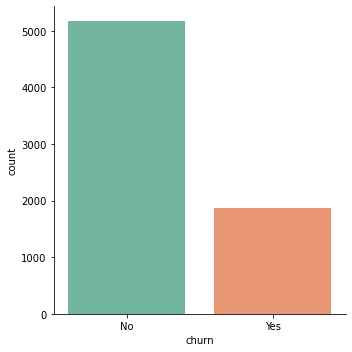

In [21]:
import seaborn as sns
sns.catplot(x="churn",kind="count", palette="Set2", data=df)
yes = len(df[df['churn']=='Yes'])
no = len(df[df['churn']=='No'])

print('There are',yes,'former customers.')
print('There are',no,'current customers.')

In [22]:
df['churn'].unique()

array(['No', 'Yes'], dtype=object)

In [23]:
churn_rate = df['churn'].value_counts()
churn_rate

No     5174
Yes    1869
Name: churn, dtype: int64

<AxesSubplot:>

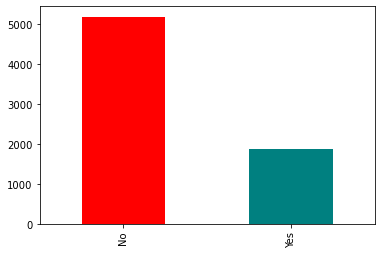

In [24]:
df['churn'].value_counts().plot.bar(color=['red','teal'])

<AxesSubplot:xlabel='seniorcitizen', ylabel='churn'>

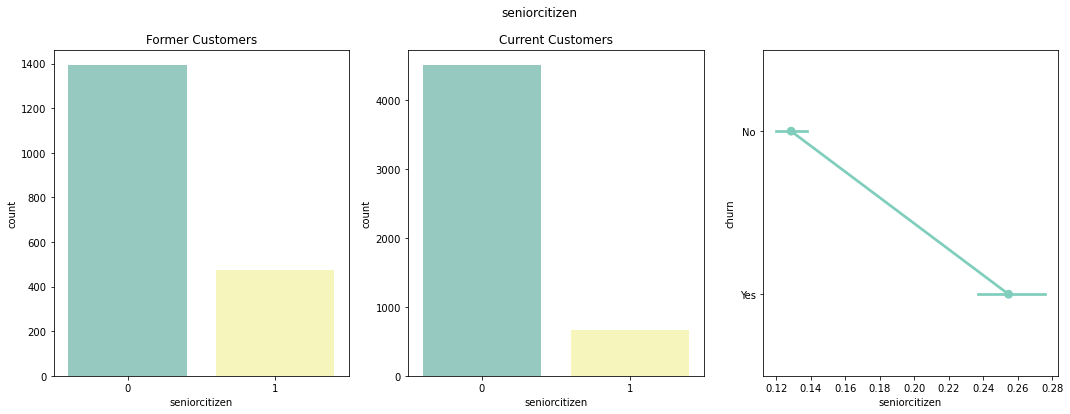

In [25]:
import matplotlib.pyplot as plt
former = df[df['churn'] == 'Yes']
current = df[df['churn'] == 'No']
fig, axes = plt.subplots(1, 3, figsize=(18,6))
fig.suptitle('seniorcitizen')

sns.countplot(ax=axes[0],x=former["seniorcitizen"],palette="Set3", data=former).set(title='Former Customers')
sns.countplot(ax=axes[1],x=current["seniorcitizen"],palette="Set3", data=current).set(title='Current Customers')
sns.pointplot(ax=axes[2],x="seniorcitizen",y="churn",color='#7fcdbb',data=df)

<AxesSubplot:xlabel='gender_Male', ylabel='churn'>

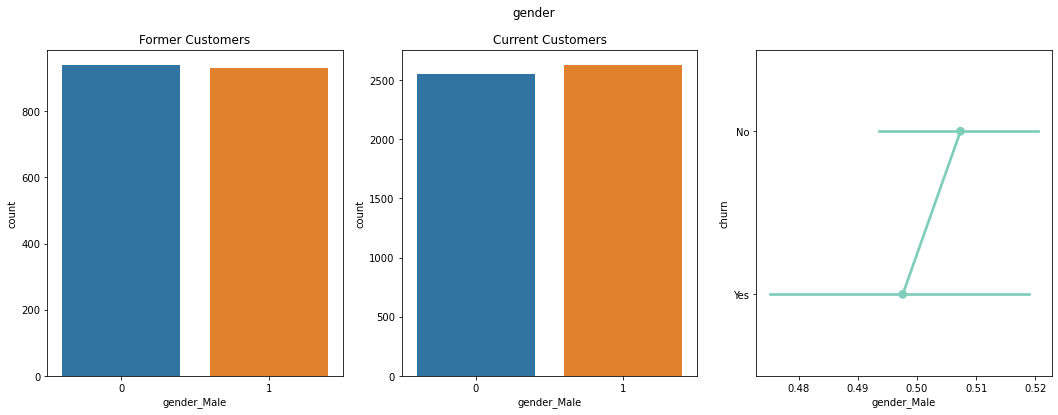

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(18,6))
fig.suptitle('gender')

sns.countplot(ax=axes[0],x=former["gender_Male"], data=former).set(title='Former Customers')
sns.countplot(ax=axes[1],x=current["gender_Male"], data=current).set(title='Current Customers')
sns.pointplot(ax=axes[2],x="gender_Male",y="churn",color='#7fcdbb',data=df)

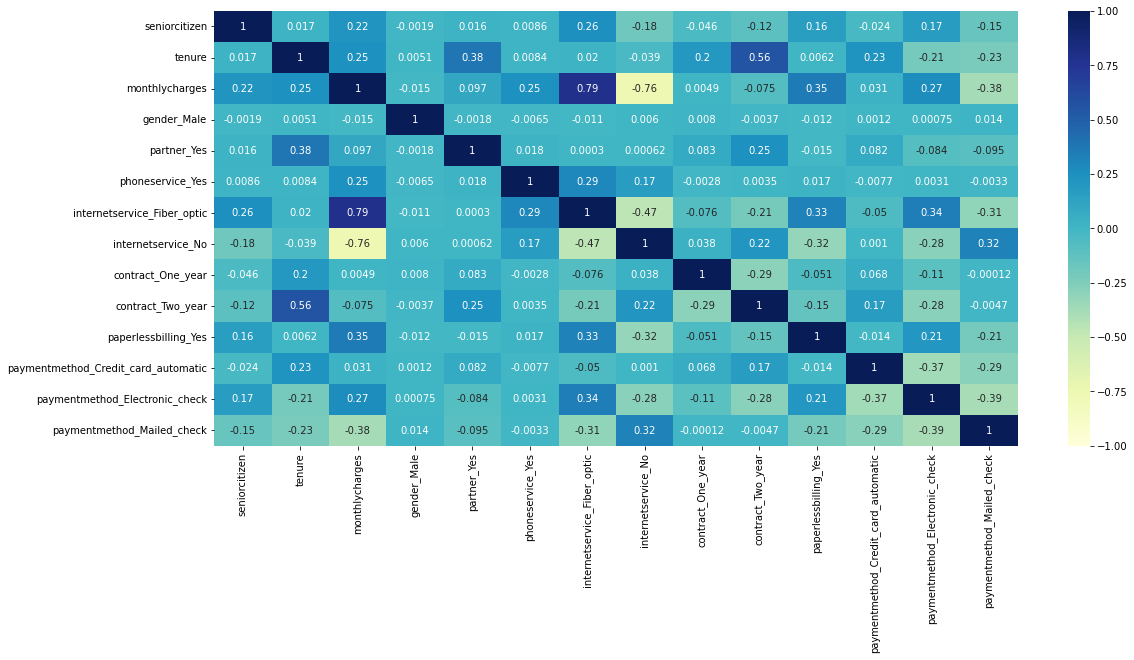

In [27]:
plt.figure(figsize=(18, 8))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True,cmap='YlGnBu')

# Model

In [27]:
X = df.drop(columns='churn')
X = pd.DataFrame(preprocessing.StandardScaler().fit_transform(X), columns=X.columns)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=555, stratify=y)
X

,seniorcitizen,tenure,monthlycharges,gender_Male,partner_Yes,phoneservice_Yes,internetservice_Fiber_optic,internetservice_No,contract_One_year,contract_Two_year,paperlessbilling_Yes,paymentmethod_Credit_card_automatic,paymentmethod_Electronic_check,paymentmethod_Mailed_check
0,-0.439916,-1.277445,-1.160323,-1.009559,1.034530,-3.054010,-0.885660,-0.525927,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807
1,-0.439916,0.066327,-0.259629,0.990532,-0.966622,0.327438,-0.885660,-0.525927,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,1.835513
2,-0.439916,-1.236724,-0.362660,0.990532,-0.966622,0.327438,-0.885660,-0.525927,-0.514249,-0.562975,0.829798,-0.525047,-0.711026,1.835513
3,-0.439916,0.514251,-0.746535,0.990532,-0.966622,-3.054010,-0.885660,-0.525927,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,-0.544807
4,-0.439916,-1.236724,0.197365,-1.009559,-0.966622,0.327438,1.129102,-0.525927,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.439916,-0.340876,0.665992,0.990532,1.034530,0.327438,-0.885660,-0.525927,1.944582,-0.562975,0.829798,-0.525047,-0.711026,1.835513
7039,-0.439916,1.613701,1.277533,-1.009559,1.034530,0.327438,1.129102,-0.525927,1.944582,-0.562975,0.829798,1.904590,-0.711026,-0.544807
7040,-0.439916,-0.870241,-1.168632,-1.009559,1.034530,-3.054010,-0.885660,-0.525927,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807
7041,2.273159,-1.155283,0.320338,0.990532,1.034530,0.327438,1.129102,-0.525927,-0.514249,-0.562975,0.829798,-0.525047,-0.711026,1.835513


In [28]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: churn, Length: 7043, dtype: object

In [29]:
%%time
LR = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=555)
RF = RandomForestClassifier(n_estimators = 100, random_state=555)
SVM = SVC(random_state=0, probability=True)
KNC = KNeighborsClassifier()
DTC = DecisionTreeClassifier()
ABC = AdaBoostClassifier(n_estimators = 100)
BC = BaggingClassifier(n_estimators = 100)
GBC = GradientBoostingClassifier(n_estimators = 100)
# clf_XGB = XGBClassifier(n_estimators = 100, objective= 'binary:logistic', seed=555, use_label_encoder=False)
clf_XGB = XGBClassifier(n_estimators = 100, seed=555, eval_metric='logloss')
clfs = []
print('5-fold cross validation:\n')
for clf, label in zip([LR, RF, SVM, KNC, DTC, ABC, BC, GBC],
                      ['Logistic Regression',
                       'Random Forest',
                       'Support Vector Machine',
                       'KNeighbors',
                       'Decision Tree',
                       'Ada Boost',
                       'Bagging',
                       'Gradient Boosting',]):
    scores = sklearn.model_selection.cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")
    print("Train CV Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
    md = clf.fit(X_train, y_train)
    clfs.append(md)
    print("Test Accuracy: %0.4f " % (sklearn.metrics.accuracy_score(clf.predict(X_test), y_test)))

5-fold cross validation:

Train CV Accuracy: 0.798 (+/- 0.011) [Logistic Regression]
Test Accuracy: 0.8105 
Train CV Accuracy: 0.768 (+/- 0.008) [Random Forest]
Test Accuracy: 0.7750 
Train CV Accuracy: 0.794 (+/- 0.010) [Support Vector Machine]
Test Accuracy: 0.7963 
Train CV Accuracy: 0.762 (+/- 0.005) [KNeighbors]
Test Accuracy: 0.7708 
Train CV Accuracy: 0.735 (+/- 0.013) [Decision Tree]
Test Accuracy: 0.7296 
Train CV Accuracy: 0.794 (+/- 0.007) [Ada Boost]
Test Accuracy: 0.7991 
Train CV Accuracy: 0.778 (+/- 0.007) [Bagging]
Test Accuracy: 0.7708 
Train CV Accuracy: 0.797 (+/- 0.009) [Gradient Boosting]
Test Accuracy: 0.8034 
CPU times: total: 45.2 s
Wall time: 45.8 s


In [30]:
# using Logistic Regression model as our final model
from sklearn.metrics import accuracy_score

LR = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=555)
LR.fit(X_train, y_train)
y_predd = LR.predict(X_test)
print(y_predd)
print ("Logistic Regression Classifier \nAccuracy is ",
            accuracy_score(y_test, y_predd)*100 )
LR.score(X_test, y_test)

['No' 'No' 'No' ... 'No' 'Yes' 'No']
Logistic Regression Classifier 
Accuracy is  81.05039034776436


0.8105039034776437

In [31]:
# we will dump our model in a pickle file for creating a flask server
import pickle
pickle.dump(LR, open('churnmodel.pkl','wb'))